In [1]:
from torch import tensor
import torch
import torch.nn as nn
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Default parameters
img_width = 300
img_height = 300

img_location = "../data/suzy.jpg"

img = cv2.imread(img_location)
img = cv2.resize(img, (img_width, img_height))

# Perform a transpose against numpy to be valid shape for tensor
img_tensor = torch.tensor(img.transpose((2,0,1))).float()

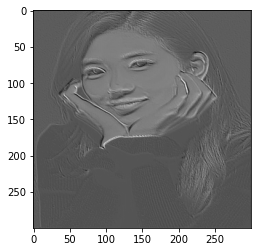

torch.Size([1, 3, 300, 300])
torch.Size([1, 16, 300, 300])


In [3]:
conv = nn.Conv2d(3, 16, kernel_size=3, padding=1)
output = conv(img_tensor.unsqueeze(0))
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

print(img_tensor.unsqueeze(0).shape)
print(output.shape)

torch.Size([1, 3, 300, 300])
torch.Size([1, 3, 150, 150])


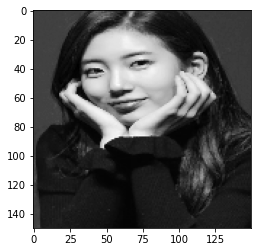

torch.Size([1, 3, 150, 150])


In [4]:
# Max Pooling
pool = nn.MaxPool2d(2)
output = pool(img_tensor.unsqueeze(0))

print(img_tensor.unsqueeze(0).shape)
print(output.shape)

plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

print(output.shape)

In [5]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8 * 75 * 75, 32)
        self.act3 = nn.Tanh()
        self.fc2 = nn.Linear(32, 2)
    
    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = out.view(-1, 8 * 75 * 75)
        out = self.act3(self.fc1(out))
        print(out.shape)
        out = self.fc2(out)
        return out

In [6]:
model = Net()
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

model.forward(img_tensor.unsqueeze(0))

torch.Size([1, 32])


tensor([[-0.2662,  0.1475]], grad_fn=<AddmmBackward>)